# Proyecto final. Análisis de factores que inciden en la actividad delictiva

## Análisis de estadística descriptiva

Importamos la base de datos:

In [1]:
import pandas as pd
import numpy as np

In [3]:
bd = pd.read_csv("base_final.csv")
bd.head()

,ao,clave_ent,edo,homicidio,robocasa,robocalle,robocarro,extorsion,tasa_hom,tasa_rcasa,...,desocupa,edad15a24,edad25a34,edad35a44,edad45mas,pob_tot,pibe,ingreso,pob_ext,pobreza
0,2015,1,Aguascalientes,211,2525,1754,1995,39,15.84,189.59,...,4.577627,255649,211782,175356,296621,1331825,198220.6406,207024.0,2.09,31.58
1,2016,1,Aguascalientes,233,2459,1353,3110,70,17.19,181.43,...,3.973306,258733,217183,178187,308198,1355321,211672.4688,203879.0,2.30,28.22
2,2017,1,Aguascalientes,258,3327,1949,3624,121,18.75,241.83,...,3.599153,260495,222453,180840,320035,1375782,216705.5625,206760.0,2.18,25.99
3,2018,1,Aguascalientes,283,3355,2216,3309,138,20.28,240.36,...,3.626284,261963,227600,183553,331996,1395794,224807.4688,222261.0,1.17,26.18
4,2019,1,Aguascalientes,269,2817,1780,2399,116,19.00,199.02,...,3.532177,263225,232527,186443,344052,1415421,223622.4844,NaN,NaN,NaN


Exploramos a detalle la base de datos

In [4]:
bd.shape

(160, 23)

Tenemos 160 renglones y 23 columnas. Las varibles en las columnas son:

In [5]:
bd.columns

Index(['ao', 'clave_ent', 'edo', 'homicidio', 'robocasa', 'robocalle',
       'robocarro', 'extorsion', 'tasa_hom', 'tasa_rcasa', 'tasa_rcalle',
       'tasa_rcarro', 'tasa_extor', 'desocupa', 'edad15a24', 'edad25a34',
       'edad35a44', 'edad45mas', 'pob_tot', 'pibe', 'ingreso', 'pob_ext',
       'pobreza'],
      dtype='object')

In [6]:
bd.describe(include="all")

,ao,clave_ent,edo,homicidio,robocasa,robocalle,robocarro,extorsion,tasa_hom,tasa_rcasa,...,desocupa,edad15a24,edad25a34,edad35a44,edad45mas,pob_tot,pibe,ingreso,pob_ext,pobreza
count,160.000000,160.000000,160,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,128.000000,128.000000,128.000000
unique,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Baja California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2017.000000,16.500000,NaN,1230.825000,2701.98125,2454.343750,5914.500000,198.181250,34.348250,92.510375,...,3.602700,6.855021e+05,6.187375e+05,5.260511e+05,1.004019e+06,3.875842e+06,5.391530e+05,185299.796875,6.985859,41.128516
std,1.418654,9.262082,NaN,945.839998,2300.18593,4721.687582,8838.664012,311.248164,20.720682,87.032577,...,1.114326,5.583670e+05,5.224428e+05,4.565163e+05,8.838526e+05,3.217754e+06,5.618525e+05,54779.270982,7.217705,14.972258
min,2015.000000,1.000000,NaN,84.000000,80.00000,0.000000,221.000000,0.000000,3.900000,6.520000,...,1.279218,1.290150e+05,1.190830e+05,1.004100e+05,1.644870e+05,7.198460e+05,9.558523e+04,96910.000000,0.470000,12.890000
25%,2016.000000,8.750000,NaN,460.250000,1314.75000,181.250000,1515.250000,24.750000,20.145000,33.562500,...,2.790710,3.218815e+05,2.879238e+05,2.341340e+05,4.308870e+05,1.757316e+06,2.283873e+05,149374.750000,2.440000,28.745000
50%,2017.000000,16.500000,NaN,1000.500000,2349.00000,819.500000,3421.500000,116.000000,27.825000,65.875000,...,3.543905,5.310785e+05,4.696965e+05,4.113720e+05,7.893785e+05,3.026771e+06,3.835130e+05,181618.000000,4.360000,40.015000
75%,2018.000000,24.250000,NaN,1761.250000,3112.75000,1765.000000,5461.500000,198.250000,42.885000,116.817500,...,4.201930,8.681305e+05,7.657412e+05,6.139250e+05,1.156226e+06,4.895339e+06,5.778418e+05,215024.250000,7.825000,50.660000


**En esta sección** el análisis se enfocará en analizar la evolución y características de las variables de:

- Ingreso promedio de los hogares (_ingreso_)
- Porcentaje de población que se encuentra en situación de pobreza (_pobreza_)
- Porcentaje de población que se encuentra en situación de pobreza extrema (_pob_ext_)
    
para cada una de las entidades federativas, durante el periodo 2015-2018.

Para ello, se trabajará con un subcojunto de la base de datos original que contenga solo las variables de interés, y a la cual se le aplicarán las manipulaciones necesarias para el análisis.

In [42]:
bd_cbp=bd.drop(["homicidio", "robocasa", "robocalle",
       "robocarro", "extorsion", "desocupa", "edad15a24", "edad25a34",
       "edad35a44", "edad45mas", "pob_tot", "pibe"],axis=1)
bd_cbp.tail()

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
155,2015,32,Zacatecas,22.29,55.88,3.12,138.73,5.68,141364.0,4.63,50.94
156,2016,32,Zacatecas,37.67,32.72,2.16,138.74,5.01,150466.0,3.52,49.00
157,2017,32,Zacatecas,42.34,43.38,3.80,124.92,11.54,153315.0,2.93,47.34
158,2018,32,Zacatecas,42.62,42.44,3.35,119.76,14.31,140328.0,3.37,46.76
159,2019,32,Zacatecas,40.25,36.50,2.30,103.41,20.49,NaN,NaN,NaN


In [159]:
i = bd_cbp[(bd_cbp.ao == 2019)].index
bd_cbp=bd_cbp.drop(i,axis=0)
bd_cbp.tail()

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
153,2018,31,Yucatan,3.99,63.17,4.08,13.63,0.23,191822.0,6.66,40.80
155,2015,32,Zacatecas,22.29,55.88,3.12,138.73,5.68,141364.0,4.63,50.94
156,2016,32,Zacatecas,37.67,32.72,2.16,138.74,5.01,150466.0,3.52,49.00
157,2017,32,Zacatecas,42.34,43.38,3.80,124.92,11.54,153315.0,2.93,47.34
158,2018,32,Zacatecas,42.62,42.44,3.35,119.76,14.31,140328.0,3.37,46.76


### Ingreso promedio de los hogares por entidad federativa

Visualizamos la evolución del ingreso promedio durante el periodo 2015-2018 para cada entidad federativa

In [88]:
anios=["2015","2016","2017","2018"]
anios

['2015', '2016', '2017', '2018']

A través de un loop generamos un diccionario que contiene los datos para cada entidad. Esto facilitará la visualización:

In [135]:
num_edo=np.arange(1,33,1)
num_edo

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [168]:
ent={}
for i in np.arange(1,33,1):
    ent[i]=bd_cbp.groupby("clave_ent").get_group(i)
    ent[i]=ent[i].reset_index(drop=True)

In [169]:
## mostramos ejemplo de un Estado en particular
ent[18]

,ao,clave_ent,edo,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
0,2015,18,Nayarit,12.30,37.89,0.0,21.92,0.08,176238.0,7.79,38.23
1,2016,18,Nayarit,6.92,17.87,0.0,18.19,0.41,177662.0,7.93,37.53
2,2017,18,Nayarit,23.43,7.46,0.0,22.70,0.08,178449.0,7.69,36.88
3,2018,18,Nayarit,35.61,6.71,0.0,73.30,0.32,178553.0,5.88,34.77


Generamos gráfica que contiene la evolución del ingreso anual promedio de los hogares en cada entidad federativa:

Text(0.5, 1.02, 'Evolución del ingreso anual promedio de los hogares\n(miles de pesos de 2018)')

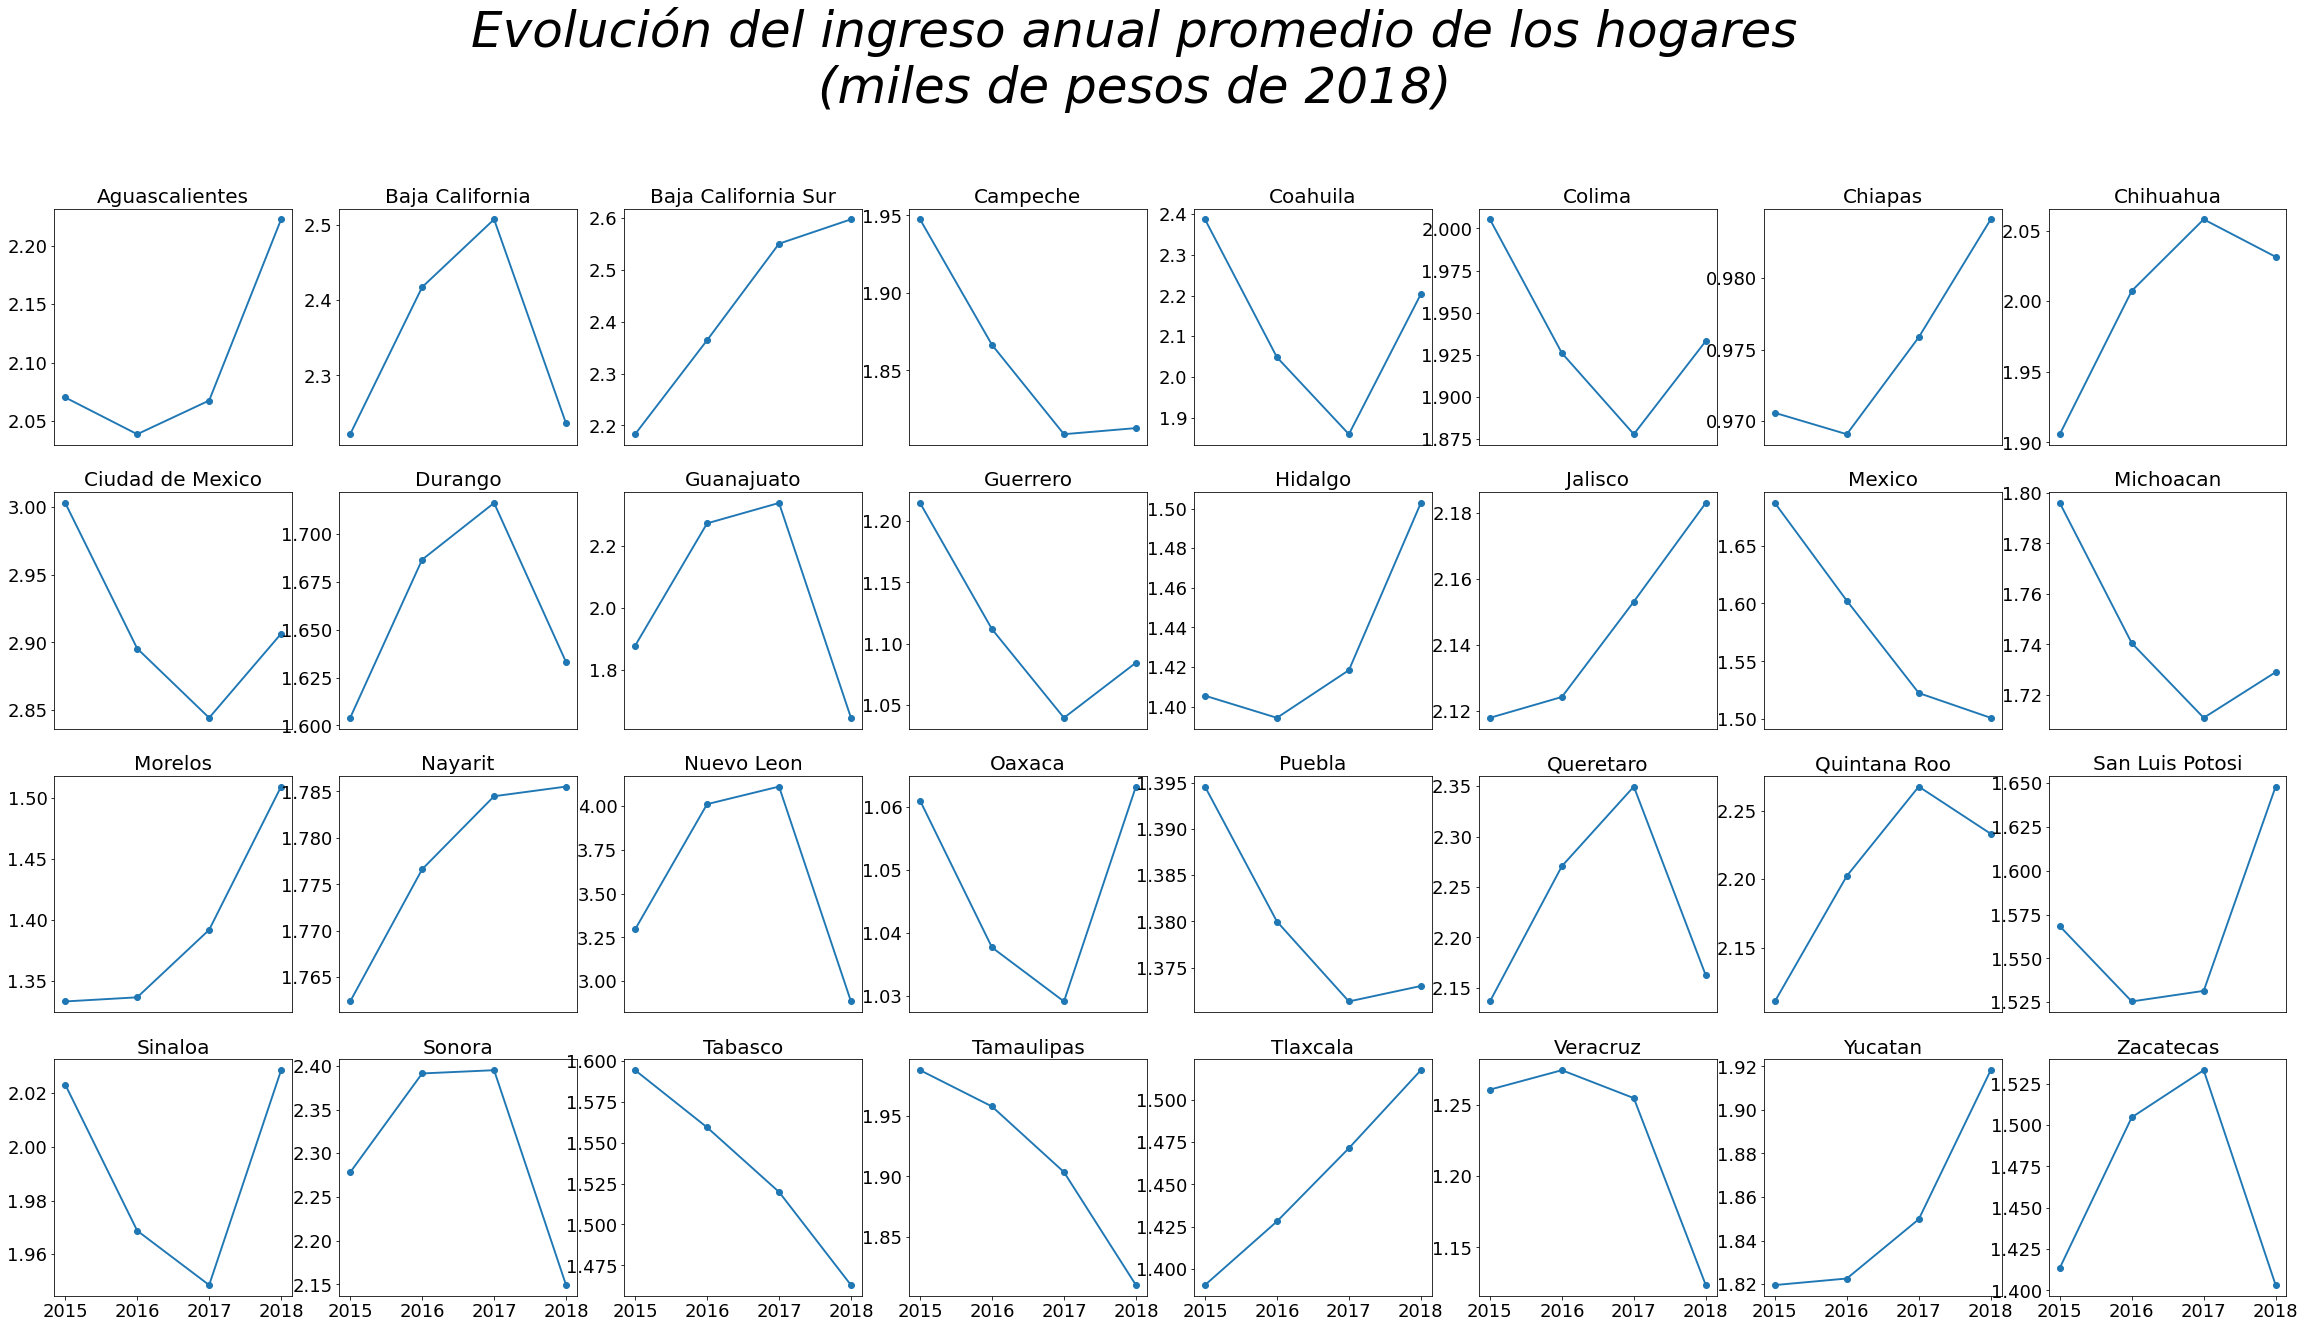

In [210]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].ingreso/100000, marker="o", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   

        

plt.suptitle("Evolución del ingreso anual promedio de los hogares\n(miles de pesos de 2018)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)

Como puede observarse, la evolución del ingreso real de los hogares no fue homogeneo en las entidades del país durante 2015-2018. En Estados como Aguascalientes, Chiapas, Jalisco, Puebla, Tlaxcala o Yucatán el ingreso real se incrementó sostenidamente durante el periodo.

En contraste, los hogares que habitan en entidades como Campeche, Coahuila, Colima, Ciudad de México, Estado de México, Nuevo León, Sonora, Veracruz, entre otras, vieron disminuidos sus ingresos durante 2015-2018.

Por otro lado, en algunas entidades, el nivel de ingreso de los hogares observado en 2018 se ubicó en niveles muy similares a los observados en 2015, en términos reales. Tal es el caso de Estados como Baja California, Querétaro, Sinaloa y Zacatecas. No obstante, el comportamiento intermedio difiere. Por ejemplo, en Sinaloa, el ingreso anual disminuyó en 2016 y 2017 de manera importante y en 2018 se recuperó a un nivel similar al de 2015; mientras que en Baja California se observó el comportamiento inverso: después de registrarse un crecimiento del ingreso en 2016 y 2017, la caída en el ingreso de 2018 significó que éste retrocediera al nivel observado 3 años antes.


### Pobreza

Asimismo, observamos la evolución del porcentaje de población en situación de pobreza durante el periodo 2015-2018 para cada entidad federativa:

Text(0.5, 1.02, 'Evolución de la población en situación de pobreza\n(%)')

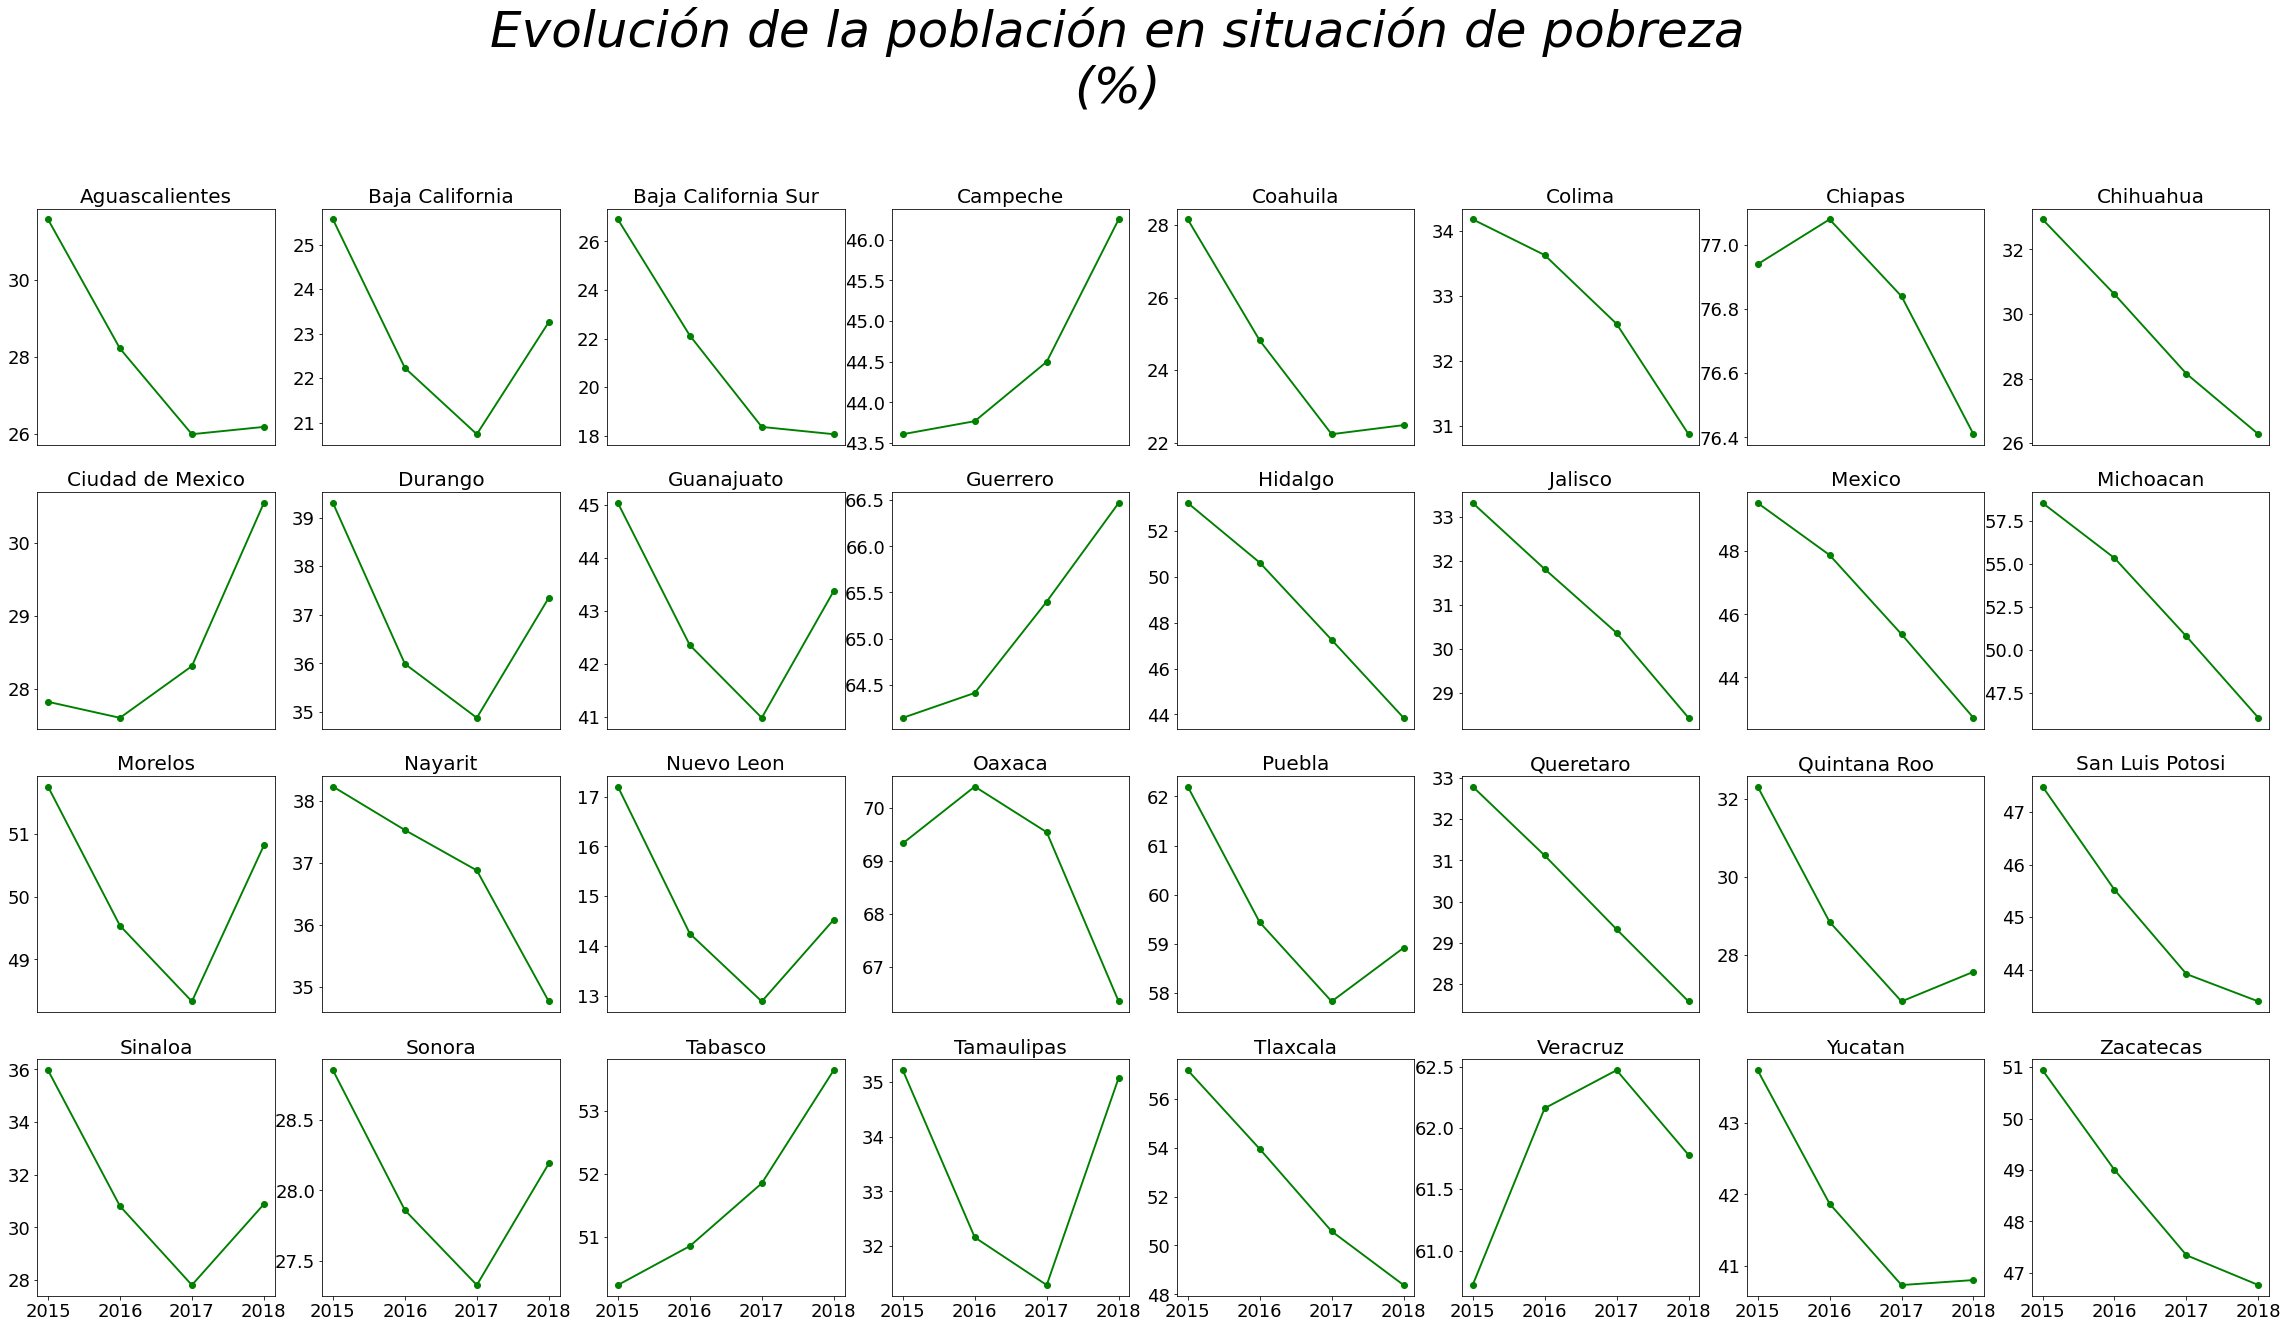

In [219]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].pobreza, marker="o", color="g", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   

        

plt.suptitle("Evolución de la población en situación de pobreza\n(%)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)

Se observa que, durante el periodo de análisis, 26 de las 32 entidades disminuyeron el porcentaje de pobreza. De las cuales destacan por haber disminuido la pobreza consistentemente cada año:

- Baja California Sur
- Colima
- Chihuahua 
- Hidalgo
- Jalisco
- Estado de México
- Michoacán
- Nayarit
- Oaxaca
- Querétaro
- San Luis Potosí
- Tlaxcala
- Zacatecas

En contraste, las entidades donde aumentó el nivel de pobreza fueron:

- Campeche
- Ciudad de México
- Guerrero
- Tabasco
- Veracruz

Mientas que en Tamaulipas se mantuvo prácticamente constante.


### Pobreza extrema

Durante 2015-2018, la pobreza extrema en las entidades federativas evolucionó de la siguiente forma:

Text(0.5, 1.02, 'Evolución de la población en situación de pobreza extrema\n(%)')

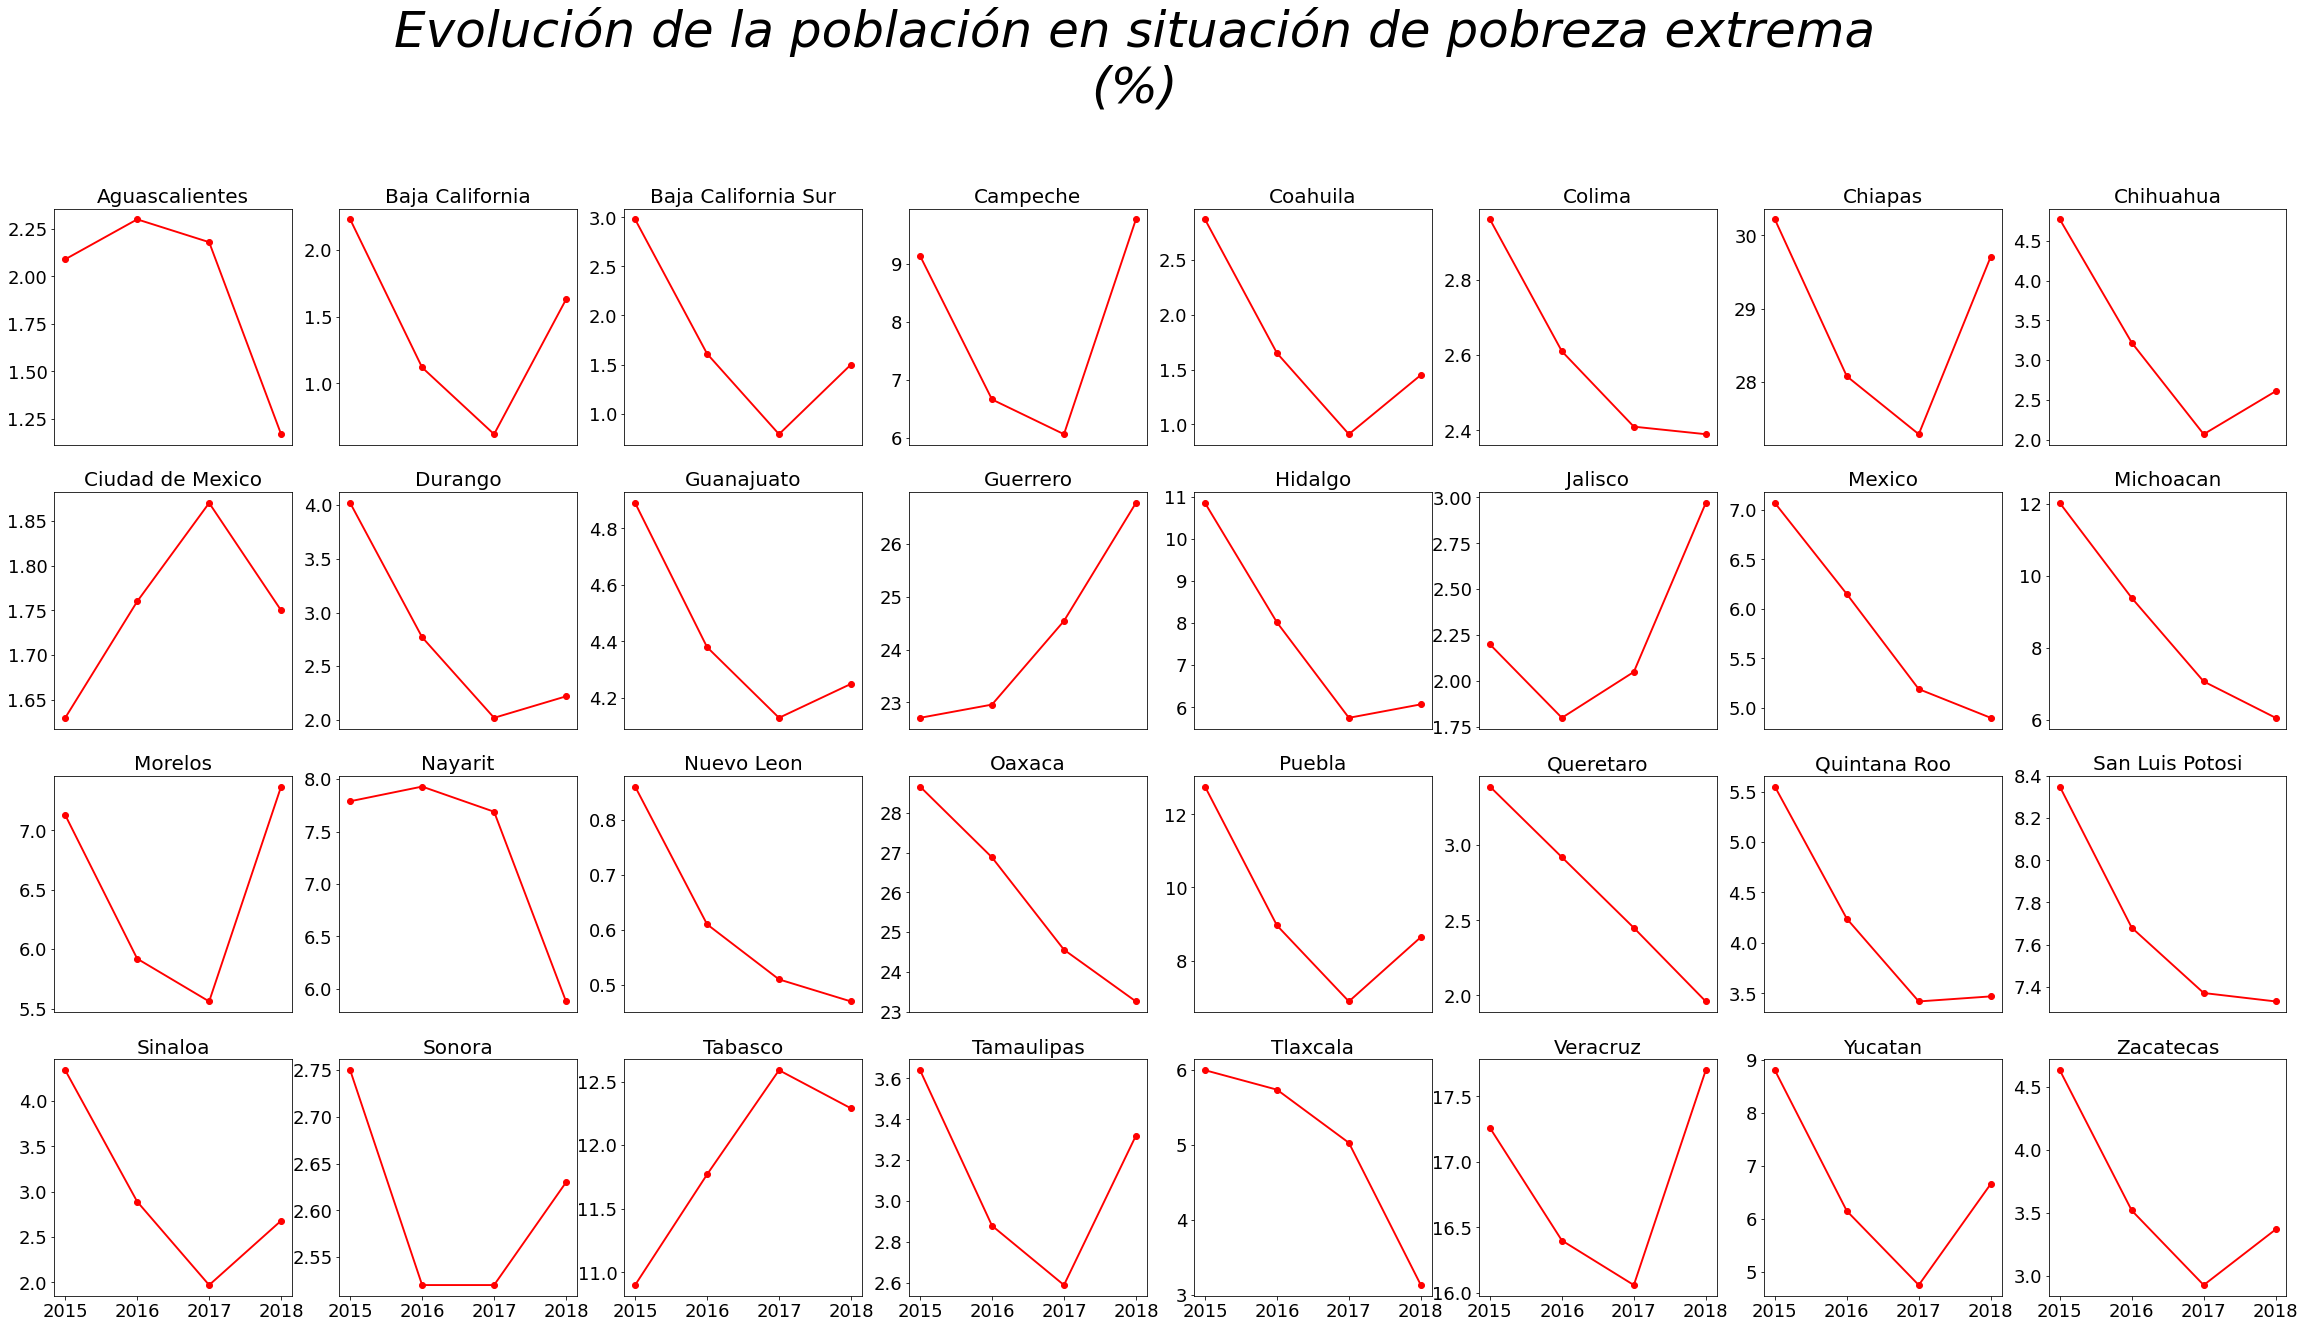

In [220]:
num=0
for i in num_edo:
    num+=1
    plt.subplot(4,8,num)
    plt.plot(anios, ent[i].pob_ext, marker="o", color="r", linewidth=1.9)
    plt.title(ent[i].edo[1],fontsize=20)
    plt.tick_params(labelsize = 18)
    plt.rcParams["figure.figsize"] = [40,20]
    
    # Not ticks everywhere
    if num < 25 :
        plt.xticks([])
   

        

plt.suptitle("Evolución de la población en situación de pobreza extrema\n(%)",fontsize=50, fontweight=0, color='black', style='italic', y=1.02)

Por su parte, 7 de las 32 entidades federativas registraron un aumento en el porcentaje de población en situación de pobreza extrema:
    
- Campeche
- Ciudad de México
- Guerrero
- Jalisco
- Morelos
- Tabasco
- Veracruz

Destaca que, en Jalisco y Morelos la pobreza extrema aumentó a pesar de que el porcentaje de pobreza disminuyó.   

**A continuación,** analizaremos el comportamiento de cada variable por entidad. Para ello, calculamos el promedio observado en el periodo:

In [204]:
bdprom=bd_cbp.groupby(["clave_ent","edo"]).mean()
bdprom.head()

,,ao,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
clave_ent,edo,,,,,,,,,
1,Aguascalientes,2016.5,18.0150,213.3025,132.9875,219.9350,6.6925,209981.00,1.9350,27.9925
2,Baja California,2016.5,60.1500,295.3250,165.9075,488.3125,5.3175,234557.00,1.4000,22.9500
3,Baja California Sur,2016.5,47.0875,356.1550,3.6225,192.6125,20.3600,242372.25,1.7200,21.3700
4,Campeche,2016.5,15.4300,11.6950,6.9450,51.4475,2.4525,185888.50,7.9075,44.5325
5,Coahuila,2016.5,16.0475,86.1200,44.2500,34.6425,0.9225,212467.50,1.7200,24.4250


In [205]:
bdprom=bdprom.drop("ao",axis=1)
bdprom.tail()

,,tasa_hom,tasa_rcasa,tasa_rcalle,tasa_rcarro,tasa_extor,ingreso,pob_ext,pobreza
clave_ent,edo,,,,,,,,
28,Tamaulipas,43.1850,83.1925,7.8775,146.9400,4.2400,191478.25,3.1075,33.4325
29,Tlaxcala,22.3200,53.9075,24.5425,138.3275,0.3400,145182.50,4.9750,52.5200
30,Veracruz,23.7725,27.3250,17.4400,98.8675,4.4900,122842.75,16.8550,61.7825
31,Yucatan,4.4700,82.0675,7.8500,16.2175,1.8925,185255.75,6.5925,41.7850
32,Zacatecas,36.2300,43.6050,3.1075,130.5375,9.1350,146368.25,3.6125,48.5100


In [ ]:
Tenemos entonces, por ejemplo, que el ingreso promedio

In [212]:
bdprom["ingreso"].describe()

count        32.000000
mean     185299.796875
std       53965.713172
min       97490.750000
25%      146071.812500
50%      185572.125000
75%      212965.750000
max      357570.250000
Name: ingreso, dtype: float64

In [19]:
bd.groupby(["ao"]).get_group(2015)

,ao,clave_ent,edo,homicidio,robocasa,robocalle,robocarro,extorsion,tasa_hom,tasa_rcasa,...,desocupa,edad15a24,edad25a34,edad35a44,edad45mas,pob_tot,pibe,ingreso,pob_ext,pobreza
0,2015,1,Aguascalientes,211,2525,1754,1995,39,15.84,189.59,...,4.577627,255649,211782,175356,296621,1331825,1.982206e+05,207024.0,2.09,31.58
5,2015,2,Baja California,1219,12999,6506,14138,221,36.30,387.13,...,4.123833,616358,560622,486906,788562,3357794,5.114595e+05,222183.0,2.23,25.57
10,2015,3,Baja California Sur,201,2469,0,1190,49,27.92,342.99,...,5.028855,129015,123499,107806,164487,719846,1.305206e+05,218298.0,2.98,26.91
15,2015,4,Campeche,118,123,89,311,34,12.87,13.42,...,2.856490,168400,153314,125511,213597,916832,6.376046e+05,194749.0,9.14,43.61
20,2015,5,Coahuila,535,3841,2638,1451,36,17.83,128.01,...,5.150488,536143,462282,415185,738013,3000556,5.639284e+05,238709.0,2.87,28.15
25,2015,6,Colima,222,1321,131,924,14,30.76,183.04,...,4.690514,129689,119083,100410,177899,721696,9.587806e+04,200535.0,2.96,34.18
30,2015,7,Chiapas,1552,1874,1084,2045,217,29.24,35.31,...,3.038809,1022446,816895,636011,1045450,5307819,2.878118e+05,97059.0,30.22,76.94
35,2015,8,Chihuahua,1286,3075,1235,4607,11,35.56,85.03,...,3.817831,652400,563958,497833,890078,3616481,5.106429e+05,190585.0,4.77,32.93
40,2015,9,Ciudad de Mexico,1585,5561,12839,12609,639,17.50,61.39,...,5.443257,1452334,1493705,1379051,2901279,9058734,2.869793e+06,300275.0,1.63,27.82
45,2015,10,Durango,494,2671,819,1554,62,27.73,149.92,...,4.998910,327572,270594,228735,424989,1781575,1.928881e+05,160400.0,4.02,39.30


In [34]:
bd.groupby(["clave_ent"]).mean(bd.ao)

UnsupportedFunctionCall: numpy operations are not valid with groupby. Use .groupby(...).mean() instead

In [8]:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

In [9]:
import matplotlib.pyplot as plt

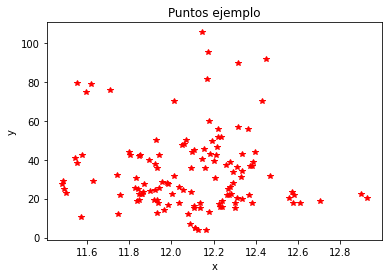

In [26]:
plt.plot(np.log(bd.ingreso),bd.tasa_hom, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

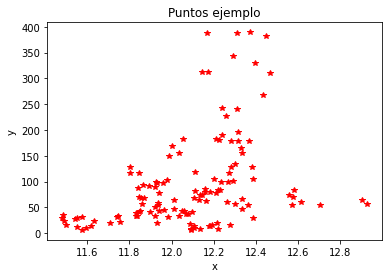

In [27]:
plt.plot(np.log(bd.ingreso),bd.tasa_rcasa, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

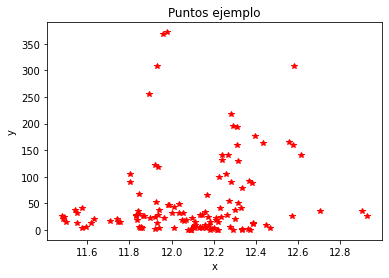

In [28]:
plt.plot(np.log(bd.ingreso),bd.tasa_rcalle, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

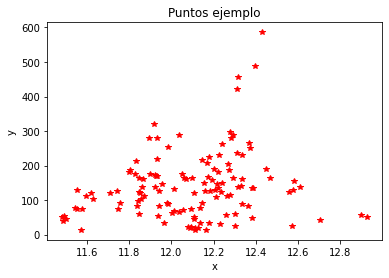

In [29]:
plt.plot(np.log(bd.ingreso),bd.tasa_rcarro, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()


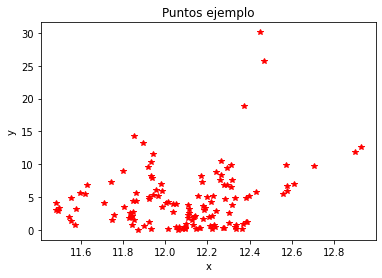

In [30]:
plt.plot(np.log(bd.ingreso),bd.tasa_extor, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

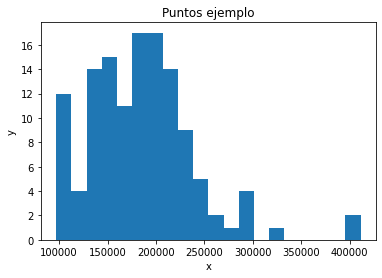

In [32]:
plt.hist(bd.ingreso,bins=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()